# Homework 5

## Logistics

**Due date**: The homework is due 23:59 on Monday, February 10.

You will submit your work on [MarkUs](https://markus.teach.cs.toronto.edu/markus/main/login_remote_auth).
To submit your work:

1. Download this file (`Homework_5.ipynb`) from JupyterHub. (See [our JupyterHub Guide](../../../guides/jupyterhub_guide.ipynb) for detailed instructions.)
2. Submit this file to MarkUs under the **hw5** assignment. (See [our MarkUs Guide](../../../guides/markus_guide.ipynb) for detailed instructions.)
All homeworks will take place in a Jupyter notebook (like this one). When you are done, you will download this notebook and submit it to MarkUs.

## Introduction

In this homework we explore: 
- row, column selection
- create new columns
- grouping
- summary statistics
- visualizing distributions

**Question:** Explore sleeping, exercising, and socializing among Canadians.

## Task 1

a) Use the `pandas` method `read_csv` to read the file `gss_tu2016_filtered.csv` into a DataFrame.  Store this `DataFrame` in a variable called `time_use_df`.

In [1]:
import pandas as pd

time_use_df = pd.read_csv("gss_tu2016_filtered.csv")

/var/folders/0j/ybsv4ncn5w50v40vdh5jjlww0000gn/T/ipykernel_85471/2651432375.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


b) Create a subset of `time_use_df` with only the following columns: `dur41`, `dur47`, `sleepdur`, `agegr10`, `prv`.  To do this follow these steps:

- Create a list called `analysis_columns` with the column names.
- Use `analysis_columns` to select these columns from `time_use_df` and store this `DataFrame` in a variable called `time_use_subset_df`.

In [2]:
analysis_columns = ["dur41", "dur47", "sleepdur", "agegr10", "prv"]

time_use_subset_df = time_use_df[analysis_columns]

time_use_subset_df

,dur41,dur47,sleepdur,agegr10,prv
0,0,0,510,5,46
1,90,0,420,5,59
2,0,0,570,4,47
3,395,60,510,6,35
4,0,0,525,2,35
...,...,...,...,...,...
17385,0,0,560,1,24
17386,0,0,600,5,24
17387,125,77,510,7,24
17388,0,0,785,6,24


c) In the next steps you will rename the columns of `time_use_subset_df` according to the following table:

Old name | New name
---------|------------
`dur41`  |`Socializing time`
`dur47`  |`Exercising time`
`sleepdur`| `Sleep time`
`agegr10`|`Age group`
`prv`    |`Province` 

Step 1: Create a dictionary called `new_col_names` with each *Old name* as a key and each *New name* as the corresponding value.

In [3]:
new_col_names = {
    "dur41": "Socializing time", 
    "dur47": "Exercising time", 
    "sleepdur": "Sleep time", 
    "agegr10": "Age group",
    "prv": "Province"
}

new_col_names

{'dur41': 'Socializing time',
 'dur47': 'Exercising time',
 'sleepdur': 'Sleep time',
 'agegr10': 'Age group',
 'prv': 'Province'}

Step 2: Use `new_col_names` to rename the columns of `time_use_subset_df` and store the DataFrame with renamed columns in a variable called `time_use_subset_renamed_df`.

In [4]:
time_use_subset_renamed_df = time_use_subset_df.rename(columns=new_col_names)

time_use_subset_renamed_df


,Socializing time,Exercising time,Sleep time,Age group,Province
0,0,0,510,5,46
1,90,0,420,5,59
2,0,0,570,4,47
3,395,60,510,6,35
4,0,0,525,2,35
...,...,...,...,...,...
17385,0,0,560,1,24
17386,0,0,600,5,24
17387,125,77,510,7,24
17388,0,0,785,6,24


## Task 2

Create columns in `time_use_subset_renamed_df` that converts time use from minutes to hours.  Since 60 minutes is equal to 1 hour we can divide the time use columns by 60 to compute the time in hours.

To do this create new columns in `time_use_subset_renamed_df` called 

  + `Socializing time (hour)`, 
  + `Exercising time (hour)`, and 
  + `Sleep time (hour)` 
  
These columns are (respectively) `Socializing time`, `Exercising time`, and `Sleep time` in hours.

In [5]:
time_use_subset_renamed_df["Socializing time (hour)"] = time_use_subset_renamed_df["Socializing time"] / 60

time_use_subset_renamed_df["Exercising time (hour)"] = time_use_subset_renamed_df["Exercising time"] / 60

time_use_subset_renamed_df["Sleep time (hour)"] = time_use_subset_renamed_df["Sleep time"] / 60

time_use_subset_renamed_df

,Socializing time,Exercising time,Sleep time,Age group,Province,Socializing time (hour),Exercising time (hour),Sleep time (hour)
0,0,0,510,5,46,0.000000,0.000000,8.500000
1,90,0,420,5,59,1.500000,0.000000,7.000000
2,0,0,570,4,47,0.000000,0.000000,9.500000
3,395,60,510,6,35,6.583333,1.000000,8.500000
4,0,0,525,2,35,0.000000,0.000000,8.750000
...,...,...,...,...,...,...,...,...
17385,0,0,560,1,24,0.000000,0.000000,9.333333
17386,0,0,600,5,24,0.000000,0.000000,10.000000
17387,125,77,510,7,24,2.083333,1.283333,8.500000
17388,0,0,785,6,24,0.000000,0.000000,13.083333


## Task 3

Some respondents in the time use survey spent no time exercising, socializing, and sleeping.  In this section we will create a `DataFrame` that only has respondents who spent time sleeping, exercising, and socializing.  In other words respondents that spent no time on these activities will be excluded.

a) Create a boolean `Series` called `well_balanced` that is `True` if time spent exercising **and** time spent sleeping **and** time spent socializing are all greater than 0, and `False` otherwise.

In [6]:
well_balanced = (
    (time_use_subset_renamed_df["Sleep time (hour)"] > 0) & 
    (time_use_subset_renamed_df["Exercising time (hour)"] > 0) & 
    (time_use_subset_renamed_df["Socializing time (hour)"] > 0)
)

b) Use `well_balanced` to filter (i.e. select) the rows of `time_use_subset_renamed_df` where respondents had non-zero times of sleeping, exercising, and socializing.  Store this filtered DataFrame in `well_balanced_df`.

In [7]:
well_balanced_df = time_use_subset_renamed_df[well_balanced]

well_balanced_df

,Socializing time,Exercising time,Sleep time,Age group,Province,Socializing time (hour),Exercising time (hour),Sleep time (hour)
3,395,60,510,6,35,6.583333,1.000000,8.500000
7,180,60,440,5,59,3.000000,1.000000,7.333333
23,80,230,330,6,46,1.333333,3.833333,5.500000
48,455,15,270,6,35,7.583333,0.250000,4.500000
54,130,185,670,1,12,2.166667,3.083333,11.166667
...,...,...,...,...,...,...,...,...
17325,25,15,640,6,47,0.416667,0.250000,10.666667
17336,105,100,525,6,59,1.750000,1.666667,8.750000
17351,40,90,540,5,46,0.666667,1.500000,9.000000
17366,120,90,490,6,59,2.000000,1.500000,8.166667


c) The number of rows in a `pandas` `DataFrame` can be computed by `len()`.  For example, `len(well_balanced_df)` is the number of rows in `well_balanced_df`.  Compute the number of respondents who were *removed* from `time_use_subset_renamed_df` when it was filtered using `well_balanced` and store this number in a variable called `diff`.

In [8]:
diff = len(time_use_subset_renamed_df) - len(well_balanced_df)

diff

16649

d) Use `diff` to compute the percentage of respondents removed from `time_use_subset_renamed_df`. Round the percentage to two decimal places, and store the result value in a variable called `pct_lost`.

In [9]:
pct_lost = round(diff / len(time_use_subset_renamed_df) * 100, 2)

pct_lost

95.74

## Task 4

In this section you will explore the distributions of time spent socializing, exercising, and sleeping by age group and province.

a) Compute the mean hours spent sleeping, socializing, and exercising by age group using `.groupby` on `well_balanced_df`.  Store this DataFrame in a variable called `group_means`.

In [10]:
group_means = well_balanced_df.groupby("Age group")[[
    "Socializing time (hour)", 
    "Exercising time (hour)",
    "Sleep time (hour)"
]].mean()


b) Create a new column in `group_means` called `Total time (hour)` that is the sum of the time (in hours) spent sleeping, exercising, and socializing.

In [11]:
group_means["Total time (hour)"] = group_means.sum(axis=1)

c) Create a new index for `group_means` using the labels of Age group found in the [code book](gss_tu2016_codebook.txt) (`gss_tu2016_codebook.txt`) and store the values in a _list_ called `index_new`. 

In [12]:
index_new = [
    "15-24",
    "25-34",
    "35-44",
    "45-54",
    "55-64",
    "65-74",
    "75+"
]

d) Change the index of `group_means` to correspond to `index_new`. 

In [13]:
group_means.index = index_new


# Display group_means to check that the index has been updated.
# On the left-hand side you should see the Age group labels, from "15-24" to "75+".
group_means

,Socializing time (hour),Exercising time (hour),Sleep time (hour),Total time (hour)
15-24,2.707031,1.372917,8.918750,12.998698
25-34,2.127004,1.321730,8.060338,11.509072
35-44,1.802305,1.254433,8.079787,11.136525
45-54,1.754045,1.121359,8.249191,11.124595
55-64,2.236025,1.150311,8.266046,11.652381
65-74,2.073184,1.221688,8.342949,11.637821
75+,2.068452,1.016270,8.640873,11.725595


e) Sort `group_means` in descending order of `Total time (hour)`.  Store this sorted `DataFrame` in a variable called `group_means_sorted`


In [14]:
group_means_sorted = group_means.sort_values(by="Total time (hour)", ascending=False)

group_means_sorted


,Socializing time (hour),Exercising time (hour),Sleep time (hour),Total time (hour)
15-24,2.707031,1.372917,8.918750,12.998698
75+,2.068452,1.016270,8.640873,11.725595
55-64,2.236025,1.150311,8.266046,11.652381
65-74,2.073184,1.221688,8.342949,11.637821
25-34,2.127004,1.321730,8.060338,11.509072
35-44,1.802305,1.254433,8.079787,11.136525
45-54,1.754045,1.121359,8.249191,11.124595


f) First, create a copy of `well_balanced_df` (using the `DataFrame` `.copy()` method), and store it in a variable called `time_spent_with_total_df`. Create a column `Total time (hour)` in `time_spent_with_total_df` by adding the three columns `Socializing time (hour)`, `Exercising time (hour)`, and `Sleep time (hour)`.

In [15]:
time_spent_with_total_df = well_balanced_df.copy()
time_spent_with_total_df["Total time (hour)"] = well_balanced_df[
    ["Exercising time (hour)", "Socializing time (hour)", "Sleep time (hour)"]
].sum(axis=1)

# # or
# well_balanced_df["Total time (hour)"] = (
#     well_balanced_df["Exercising time (hour)"] +
#     well_balanced_df["Socializing time (hour)"] +
#     well_balanced_df["Sleep time (hour)"]
# )


g) Complete the code below to create three side-by-side boxplots from `time_spent_with_total_df` using `layout=(2, 2)` and `figsize=(20, 20)` of time spent (in hours) socializing, exercising, sleeping, and their sum for each age group. Store these boxplots in a variable called `time_boxplots`.

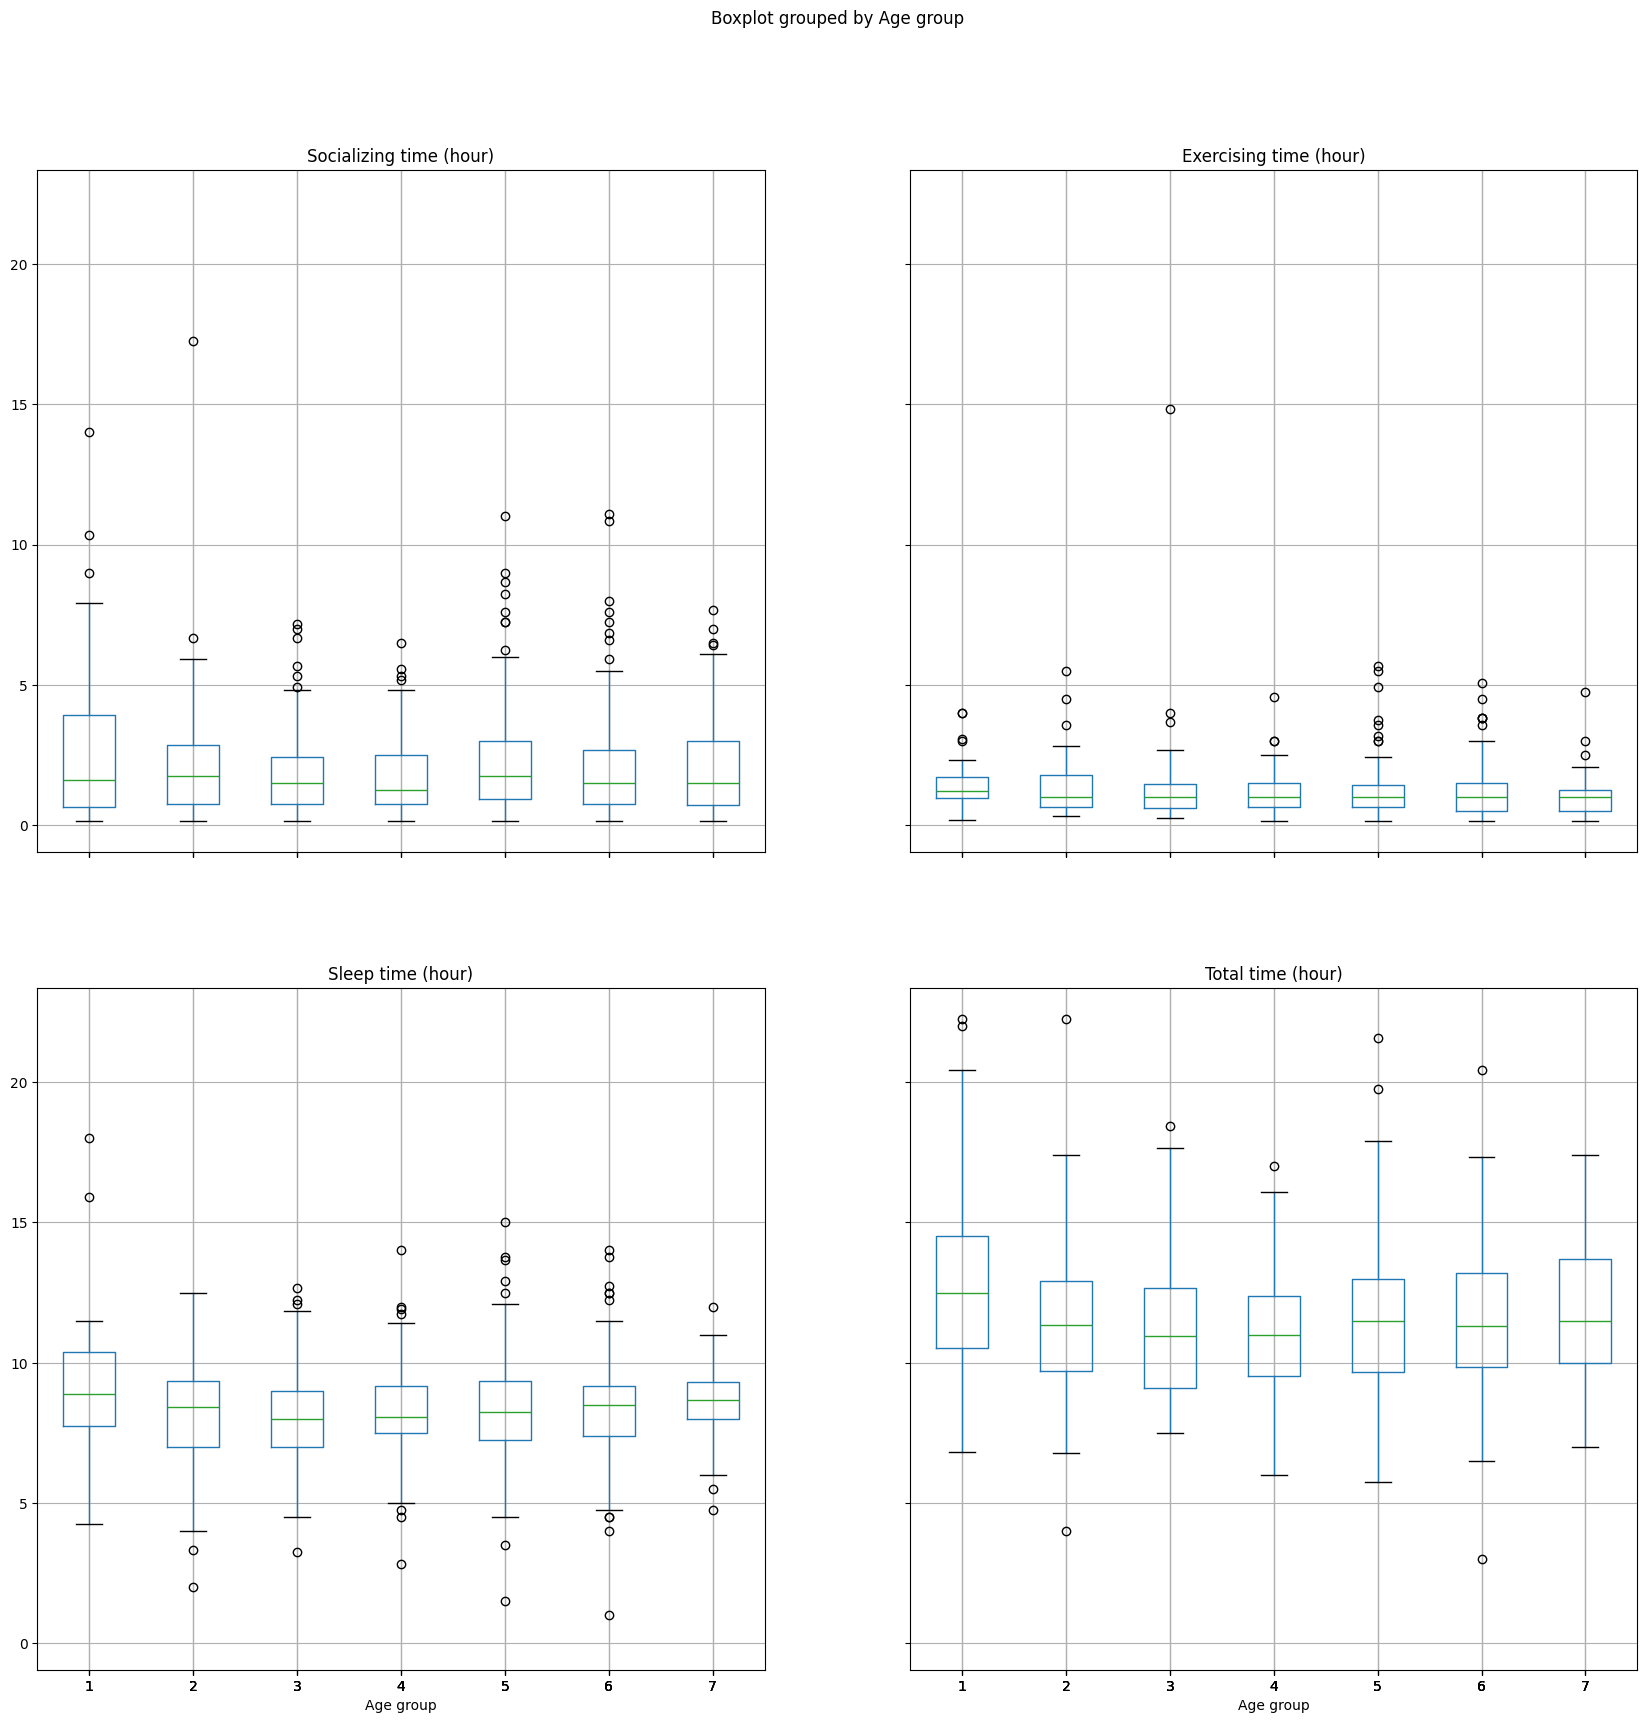

In [16]:
time_boxplots = time_spent_with_total_df.boxplot(
    column=["Socializing time (hour)", "Exercising time (hour)", "Sleep time (hour)", "Total time (hour)"], 
    by="Age group", 
    figsize=(20, 20),
    layout=(2, 2)
)

## Task 5

The tick marks on the horizontal axes of `time_boxplots` are not informative unless the viewer knows which age group each value represents.  Fix labels of boxplot by recoding `Age group` using the labels in the code book (see `gss_tu2016_codebook.txt`).

a) First, create a copy of `time_spent_with_total_df` (using the `DataFrame` `.copy()` method), and store it in a variable called `time_spent_age_label_df`. For that new `DataFrame`, recode `Age group` by adding a column called `Age group label` with the Age group labels found in the code book.

In [17]:
time_spent_age_label_df = time_spent_with_total_df.copy()

time_spent_age_label_df.loc[time_spent_age_label_df["Age group"] == 1, "Age group label"] = "15-24"

time_spent_age_label_df.loc[time_spent_age_label_df["Age group"] == 2, "Age group label"] = "25-34"

time_spent_age_label_df.loc[time_spent_age_label_df["Age group"] == 3, "Age group label"] = "35-44"

time_spent_age_label_df.loc[time_spent_age_label_df["Age group"] == 4, "Age group label"] = "45-54"

time_spent_age_label_df.loc[time_spent_age_label_df["Age group"] == 5, "Age group label"] = "55-64"

time_spent_age_label_df.loc[time_spent_age_label_df["Age group"] == 6, "Age group label"] = "65-74"

time_spent_age_label_df.loc[time_spent_age_label_df["Age group"] == 7, "Age group label"] = "75+"

time_spent_age_label_df

,Socializing time,Exercising time,Sleep time,Age group,Province,Socializing time (hour),Exercising time (hour),Sleep time (hour),Total time (hour),Age group label
3,395,60,510,6,35,6.583333,1.000000,8.500000,16.083333,65-74
7,180,60,440,5,59,3.000000,1.000000,7.333333,11.333333,55-64
23,80,230,330,6,46,1.333333,3.833333,5.500000,10.666667,65-74
48,455,15,270,6,35,7.583333,0.250000,4.500000,12.333333,65-74
54,130,185,670,1,12,2.166667,3.083333,11.166667,16.416667,15-24
...,...,...,...,...,...,...,...,...,...,...
17325,25,15,640,6,47,0.416667,0.250000,10.666667,11.333333,65-74
17336,105,100,525,6,59,1.750000,1.666667,8.750000,12.166667,65-74
17351,40,90,540,5,46,0.666667,1.500000,9.000000,11.166667,55-64
17366,120,90,490,6,59,2.000000,1.500000,8.166667,11.666667,65-74


b) Create the same boxplots as in Task 4 g) using `layout = (2, 2)` and `figsize = (20, 20)`, but use `Age group label` to create the boxplot, so that the ticks on horizontal axes of the boxplot are informative. Store this boxplot in a variable called `time_boxplots_age_label`.


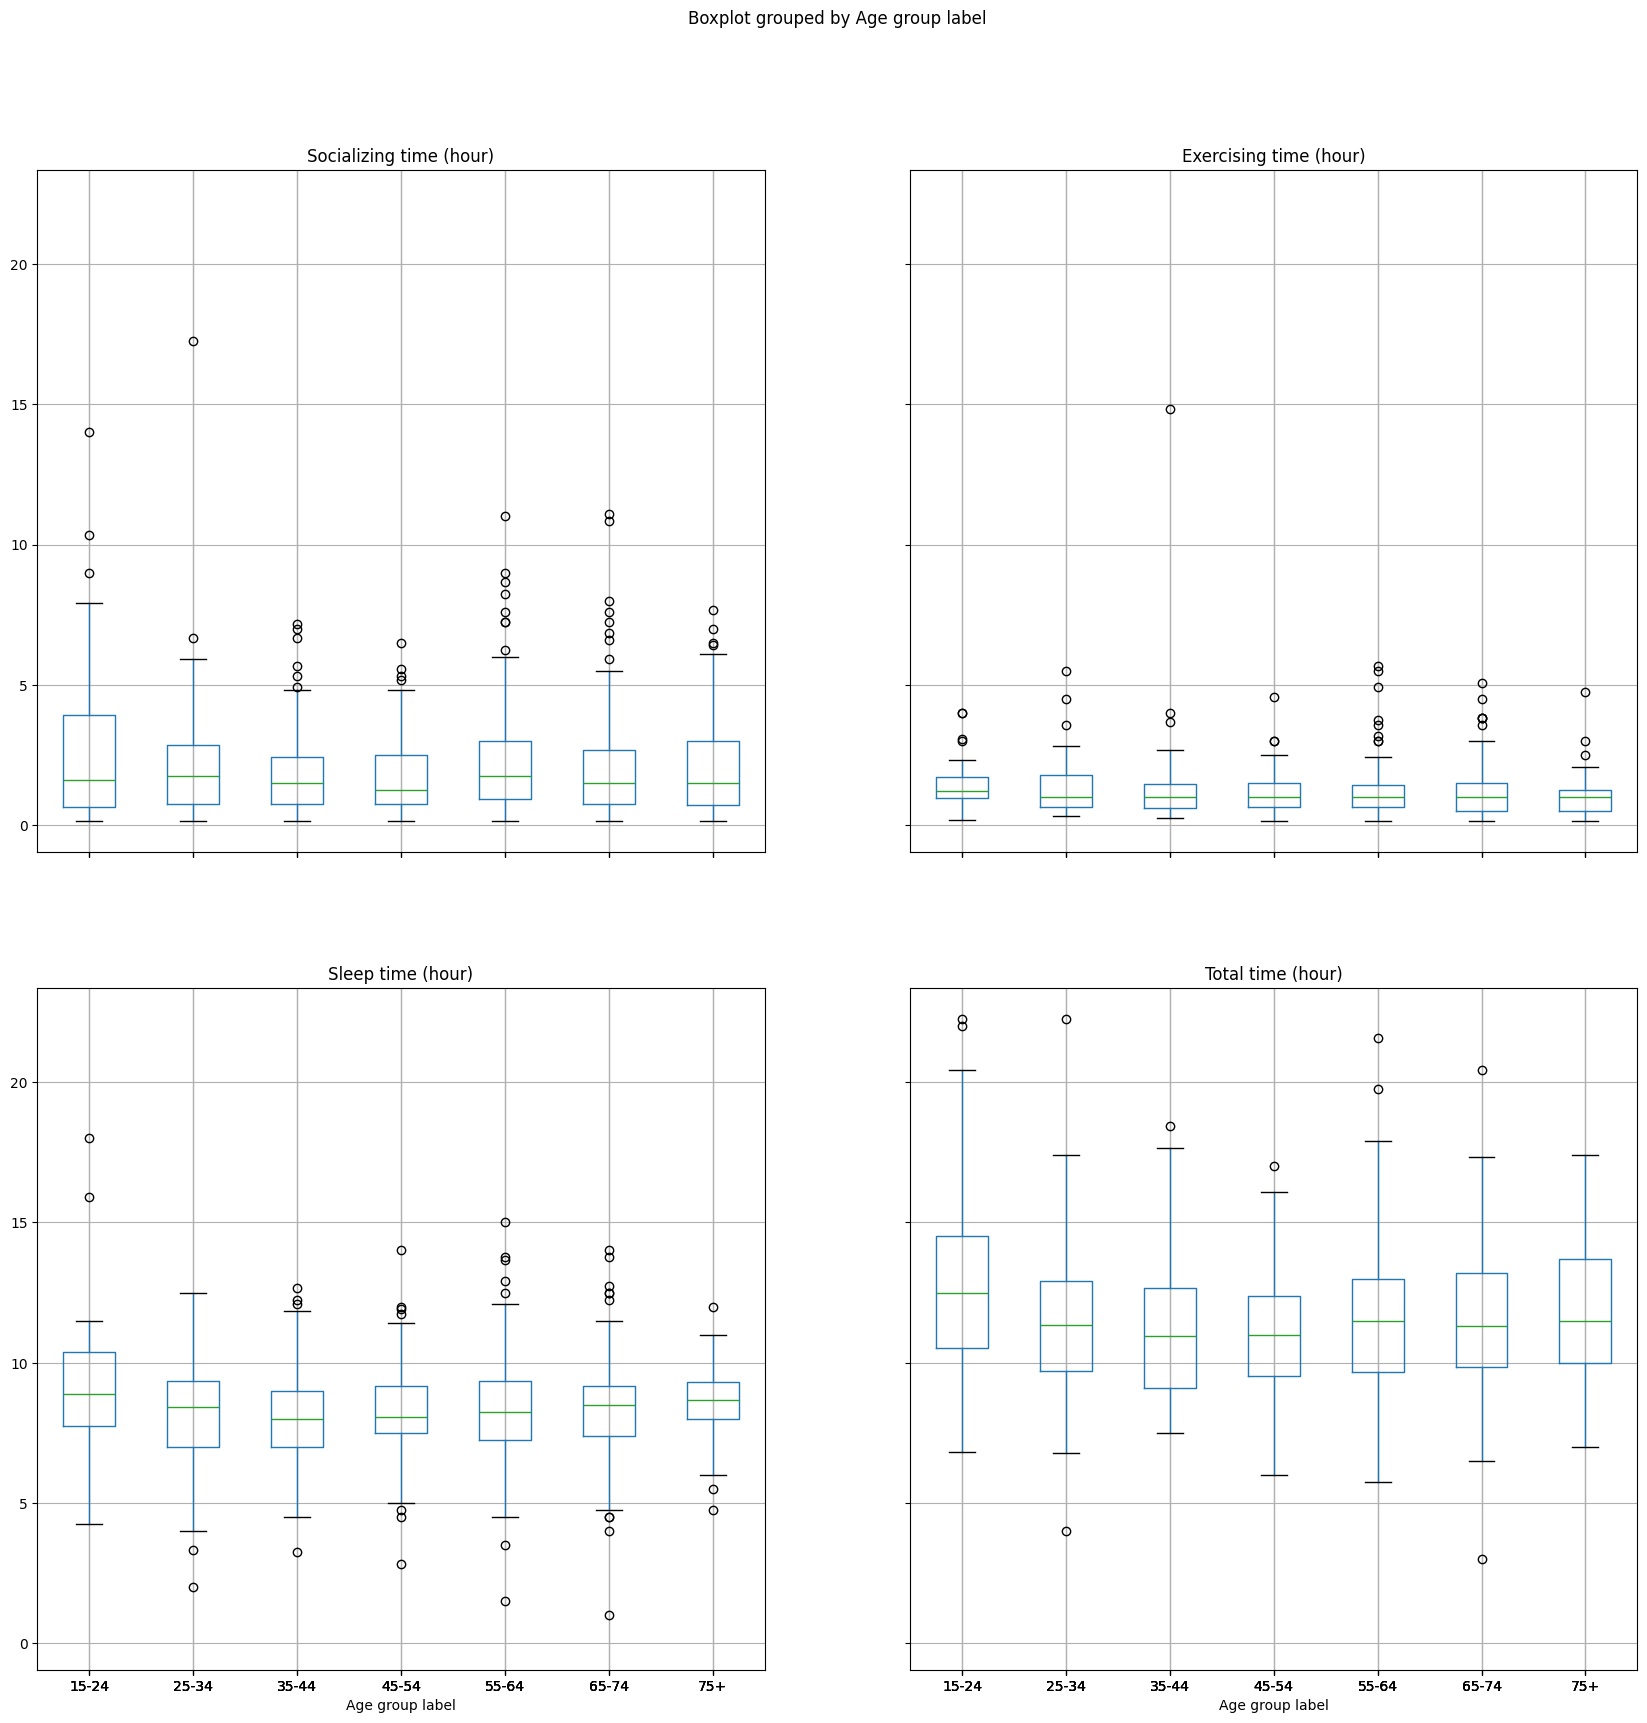

In [18]:
time_boxplots_age_label = time_spent_age_label_df.boxplot(
    column = ["Socializing time (hour)", "Exercising time (hour)", "Sleep time (hour)", "Total time (hour)"], 
    by = "Age group label", 
    figsize = (20, 20),
    layout = (2, 2)
)

## Task 6 (Written Discussion)

a) Which age group spends the most time sleeping, exercising, and socializing in total?  Does your ranking change if you use mean or median as a summary measure of time?  Briefly explain why or why not your ranking changes, and which ranking is the best representation.

b) Which age group shows the most variability in time spent socializing?  Provide a brief explanation of why this group shows the most variability.

c) State one limitations of basing this data analysis on only respondents that spent more than zero time sleeping, exercising, and socializing.  Briefly explain why it's a limitation to your findings in Tasks 4 and 5.

> *Sample solutions*
>
> a) 
> - Yes, the rankings change for the total if the mean or median is used.
> - If the median is used then the rankings are: 15-24, 25-34, 75+ ,...
> - If the mean is used then the rankings are: 15-25, 75+, 55-64, ...
> - There are outliers in sleep and socializing that we can see on the boxplots that are pushing the mean higher, but the median is not influenced by these observations.
> - The median would be a more suitable choice since it's not influenced by outliers.
>
> b) The length of the boxplot is longest for 15-24 age group.
>
> c) 96% of the data is excluded so results might be different if these observations are included.

## Marking Rubric


Section     | 0 | 1 | 2 | 3
------------|---|---|---|---
Computational questions including visualizations (for each part) |auto test fails | auto test passes | NA | NA 
Qualitative questions (for each part) | No answer | The question is answered but no explanation is given | The question is answered but the explanation is irrelevant or not supported | The question is answered and the explanation is supported